   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

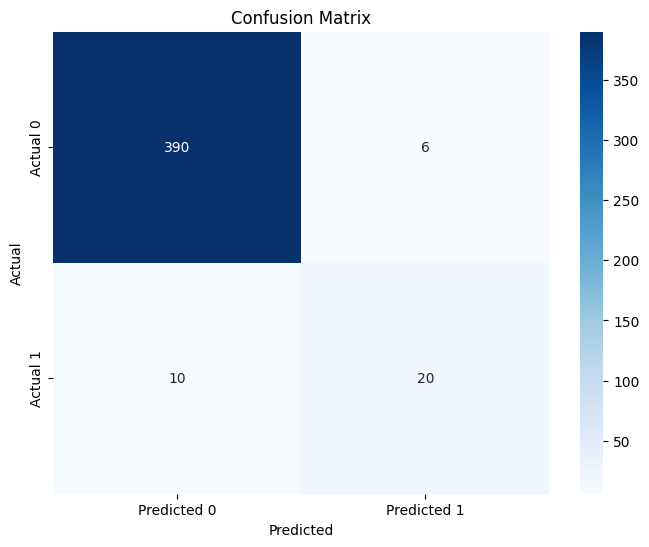

In [ ]:
# prompt: calculate RMSE, MSE, MAE, Pressicion, Accuracey etc an confusion matrix and plot it properly. Also replace SLA_pred with modified
!pip install stable_baselines3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics

df = pd.read_csv('/content/sample_data/BestCaseData.csv').rename(columns={'Network':"Requests"})
df2 = pd.read_csv('/content/sample_data/graf_data.csv')
headers = [df,df2]
dft = pd.concat(headers)
dft.head()

dft.dropna(inplace=True)
y = dft['SLA']

X=dft[['CPU','Requests']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7)


X_train['n_CPU'] = X_train['CPU']
X_train['n_NET'] = X_train['Requests']

X_train = X_train.drop(columns =['CPU', 'Requests' ] )

X_test['n_CPU'] = X_test['CPU']
X_test['n_NET'] = X_test['Requests']
X_test = X_test.drop(columns =[ 'CPU', 'Requests'])

model1 = LinearRegression()
model1.fit(X_train,y_train)
SLA_coeffs = model1.coef_
print(SLA_coeffs)

smoothing_factor = 0.4
X_test['SLA_pred'] = smoothing_factor * ((model1.coef_[0] *( X_test['n_CPU'] ))+ model1.coef_[1] * X_test['n_NET'])

#SLA_coeffs = model1.coef_
#Calculate Metrics


X_test['SLA_pred_modified'] = X_test['SLA_pred'].apply(lambda x: 0 if x < 250 else 1)
y_test_modified = y_test.apply(lambda x: 0 if x < 250 else 1)

mse = mean_squared_error(y_test_modified, X_test['SLA_pred_modified'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_modified, X_test['SLA_pred_modified'])

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

accuracy = accuracy_score(y_test_modified, X_test['SLA_pred_modified'])
precision = precision_score(y_test_modified, X_test['SLA_pred_modified'])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

cm = confusion_matrix(y_test_modified, X_test['SLA_pred_modified'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(X_test)), y=X_test['SLA_pred'], mode='lines+markers', name='Predicted SLA'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines+markers', name='Actual SLA'))
fig.update_layout(title='Predicted vs Actual SLA', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(X_test)), y=X_test['SLA_pred_modified'], mode='lines+markers', name='Predicted SLA (Modified)'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test_modified, mode='lines+markers', name='Actual SLA (Modified)'))
fig.update_layout(title='Predicted vs Actual SLA (Modified)', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()



Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Model Loaded
Episode: 0, AvgReward: 0.05357770546365883
Episode: 1, AvgReward: 0.091777954614577
Episode: 2, AvgReward: 0.0854560797600227
Episode: 3, AvgReward: 0.0956708129060203
Episode: 4, AvgReward: 0.111592968729726
Episode: 5, AvgReward: 0.11293762050867961
Episode: 6, AvgReward: 0.11218459108626501
Episode: 7, AvgReward: 0.11687179548883117
Episode: 8, AvgReward: 0.11901510148629109
Episode: 9, AvgReward: 0.12343448339158687
Episode: 10, AvgReward: 0.12271741127681472
Round: 1
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Model Loaded
Episode: 0, AvgReward: 0.11182142576391638
Episode: 1, AvgReward: 0.11695567451187502


KeyboardInterrupt: 

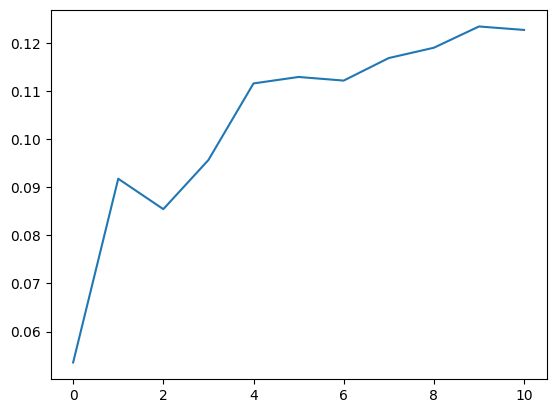

In [ ]:
import numpy as np
import tensorflow as tf
import gymnasium
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
import pandas as pd  # Assuming you are using pandas for your data
import os

class OfflineEnv(gymnasium.Env):
    def __init__(self):
        super(OfflineEnv, self).__init__()
        self.action = [0,1,2]
        self.action_space = gymnasium.spaces.Discrete(len(self.action))
        self.observation_space = gymnasium.spaces.Box(
            low=np.array([0, 0, 0]),  # Minimum values for CPU, requests, and pods
            high=np.array([1, 1, 10]),  # Maximum values for CPU, requests, and pods
            dtype=np.float32
        )
        self.states = []
        self.RTT = []
        self.state = [0, 0, 1]  # Initialize state as [CPU, Requests, Replicas]
        self.rewards = []

    def get_next_state(self, replicas):
        if replicas ==0 :
          replicas=1
        CPU = self.state[0] * (self.state[2]/replicas)
        # Placeholder for SLA coefficients, define as per your requirements
        smoothing_factor = 0.4

        self.state[1] = min(self.state[1], 100*replicas)

        SLA =  smoothing_factor * (SLA_coeffs[0] * CPU + SLA_coeffs[1] * self.state[1])
        self.RTT.append(SLA)
        return [CPU, self.state[1], replicas], SLA

    def reset(self, seed=None, options=None):
        self.state = self.custom_obs_fn()
        return self.state, {}

    def step(self, action_idx):
        # First, get the action value
        if action_idx ==0:
          action = 0
        elif action_idx ==1:
          action = 1
        elif action_idx ==2:
          action = -1

        # Validate action bounds
        replicas = max(1, min(self.state[2] + action, 6))
        self.state[2] = replicas


        # Inject new observation here
        new_obs = self.custom_obs_fn()
        self.state[0] = new_obs[0]  # CPU
        self.state[1] = new_obs[1]  # Requests
        # self.state[2] is already updated with the new replicas

        # Calculate new RTT and reward
        self.state, RTT = self.get_next_state(self.state[2])
        reward = self.Reward(self.state[0], RTT)

        self.rewards.append(reward)
        self.states.append(self.state)

        return self.state, reward, False, False, {"AvgRewards": np.mean(self.rewards)}


    def Reward(self, cpu, RTT=0):
        p = 0.9
        return (1/(1+(RTT/250)) if RTT <250 else -2) - self.state[2] *0.3

    def custom_obs_fn(self):
        # Randomly select an observation index
        i = np.random.randint(1, 1418)

        # Extract the CPU, Requests, and Replicas from the dataframe

        random_NET = dft.iloc[i]['Requests']
        replicas= max(1, min(dft.iloc[i]['Replicas'], 6))
        CPU = dft.iloc[i]['CPU'] *(dft.iloc[i]['Replicas']/replicas)
        # Return the observation as a numpy array
        obs = np.array([CPU, random_NET, replicas], dtype=np.float32)
        return obs


def offline():

  # Initialize the environment
  env = OfflineEnv()

  # Initialize the model
  if os.path.exists(f'dqn_model.zip'):
    model = DQN.load(f'dqn_model.zip')

    model.set_env(env)
    print("Model Loaded")
  else:
    model = DQN('MlpPolicy', env, verbose=1)
  # Initialize the callback
  rewards = []
  # Training loop
  for i in range(11):
      env.reset()

      model.learn(total_timesteps=1000)
      rewards.append( np.mean(env.rewards))
      print(f"Episode: {i}, AvgReward: {np.mean(env.rewards) if env.rewards else 0}")



  #States = pd.DataFrame(env.states)
  #States.columns = ['CPU', 'Requests', 'Replicas']
  plt.plot(rewards)
  '''
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=env.rewards, mode='lines+markers', name='Rewards'))
  fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=States['Requests']/100, mode='lines+markers', name='Requests'))
  fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=States['Replicas']/10, mode='lines+markers', name='Replicas'))
  fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=States['CPU'], mode='lines+markers', name='CPU'))
  fig.update_layout(title='Predicted vs Actual SLA', xaxis_title='Data Point', yaxis_title='SLA')
  fig.show()
  '''
  return model


class OfflineEnv2(gymnasium.Env):
    def __init__(self):
      super(OfflineEnv2, self).__init__()
      self.action = [ 0, 1, 2]
      self.action_space = gymnasium.spaces.Discrete(len(self.action))
      self.observation_space = gymnasium.spaces.Box(
            low=np.array([0, 0, 0]),  # Minimum values for CPU, requests, and pods
            high=np.array([1, 1, 10]),  # Maximum values for CPU, requests, and pods
            dtype=np.float32
            )
      self.states = []
      self.RTT =[]
      self.state = [0,0,1]
      self.rewards = []
      self.idx =0

    def get_current_state(self, replicas,net):
      N = net /130
      sum_CPU = 350 *N

      CPU = sum_CPU /replicas
      CPU = CPU/1000
      n_Net = min(net, 130*replicas)
      #this average I have to add the new replicas -> calculate new cpu
      smoothing_factor = 0.4


      SLA =  smoothing_factor * (SLA_coeffs[0] * CPU + SLA_coeffs[1] * n_Net )

      self.idx +=1

      self.RTT.append(SLA)
      return np.array([CPU, n_Net, replicas]), SLA


    def reset(self,seed = None, option = None):
        self.idx =0
        return  self.get_current_state(1,0)

    def step(self, action_idx, net):

      if action_idx ==0:
          action = 0
      elif action_idx ==1:
          action = 1
      elif action_idx ==2:
          action = -1

      replicas = max(1, min(self.state[2] + action, 6))
      self.state[2] = replicas

      #replicas = (self.state[2] - self.state[2].min()) / (self.state[2].max() - self.state[2].min()) +1
      #calculate reward

      self.state, RTT = self.get_current_state(self.state[2],net)
      reward = self.Reward(self.state[0], RTT)
      self.rewards.append(reward)
      info ={"AvgRewards": np.mean(self.rewards)}
      self.states.append(self.state)
      if self.idx >= 200:
        return self.state, reward, True, False, info, RTT

      return self.state, reward, False, False, info, RTT

    def Reward(self,cpu, RTT=0):
      p=0.9
      return cpu + (1/(1+(RTT/250)) if RTT <250 else -2) - self.state[2] *0.3


TRAFFIC = df['Requests'].iloc[200:400].copy()

# Create 50 values of 50
constant_traffic = pd.Series([40]*25)

# Append the constant traffic to the TRAFFIC series
TRAFFIC = pd.concat([TRAFFIC, constant_traffic], ignore_index=True)
temp = pd.DataFrame()
temp["RTT"] = [1000]
temp["CPU"] = [1000]
temp["Network"] = [1000]
temp["Replicas"] = [1000]
temp["Reward"] = [1000]
model = offline()

#%make discounts
decay =0.2
epsilon = 0.9
tcpu = 1
tsla = 1000
trep =0
trep1 =((6-1)/2)  -0.5
trep2 = 4

round_idx = 1

while True:
  print(f"Round: {round_idx}")

  if round_idx!=1:
    if temp['CPU'].describe()['mean'] < tcpu and temp['RTT'].describe()['mean'] < tsla and (temp['Replicas'].describe()['mean']>trep1 and temp['Replicas'].describe()['mean']<trep2):
      tcpu =  temp['CPU'].describe()['mean']
      tsla =  temp['RTT'].describe()['mean']
      trep = temp['Replicas'].describe()['mean']
      model.save(f'dqn_model.zip')

      model.save(f'dqn_model{round_idx}.zip')
      print("Model Saved")
    decay *= epsilon
    if round_idx == 10:
      break
  round_idx +=1
  env = OfflineEnv2()
  state, _ = env.reset()

  done = False

  cpu =[]
  network = []
  replicas = []
  rewards = []
  rtt = []
  idx=0
  model = offline()

  for net in TRAFFIC :
      state,_ = env.get_current_state(state[2],net)
      env.state = state
      action, _states = model.predict(state)
      state, reward, _,_, info, RTT = env.step(action, net)
      cpu.append(state[0])
      network.append(state[1])
      replicas.append(state[2])
      rewards.append(reward)
      rtt.append(RTT)
      idx+=1

  temp = pd.DataFrame()
  temp["RTT"] = rtt
  temp["CPU"] = cpu
  temp["Network"] = network
  temp["Replicas"] = replicas
  temp["Reward"] = rewards
  print(f"Current: {temp['CPU'].describe()['mean']}, Goal: {tcpu}")
  print(f"Current: {temp['RTT'].describe()['mean']}, Goal: {tsla}")
  print(f"Current: {temp['Replicas'].describe()['mean']}, Goal: {trep}")
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Reward'], mode='lines+markers', name='Rewards'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Network']/100, mode='lines+markers', name='Requests'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Replicas']/10, mode='lines+markers', name='Replicas'))

fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['RTT']/100, mode='lines+markers', name='RTT'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['CPU'], mode='lines+markers', name='CPU'))
fig.update_layout(title='Predicted vs Actual SLA', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()


In [ ]:
import numpy as np
import tensorflow as tf
import gymnasium
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
import pandas as pd  # Assuming you are using pandas for your data
import os
model = DQN.load('dqn_model')
TRAFFIC = df['Requests'].iloc[200:400].copy()

# Create 50 values of 50

model.set_env(env)
env = OfflineEnv2()
state, _ = env.reset()

done = False

cpu =[]
network = []
replicas = []
rewards = []
rtt = []
idx=0


for net in TRAFFIC :

    env.state = state
    action, _states = model.predict(state)
    state, reward, _,_, info, RTT = env.step(action, net)
    cpu.append(state[0])
    network.append(state[1])
    replicas.append(state[2])
    rewards.append(reward)
    rtt.append(RTT)
    idx+=1

temp = pd.DataFrame()
temp["RTT"] = rtt
temp["CPU"] = cpu
temp["Network"] = network
temp["Replicas"] = replicas
temp["Reward"] = rewards
print(f"Current: {temp['CPU'].describe()['mean']}, Goal: {tcpu}")
print(f"Current: {temp['RTT'].describe()['mean']}, Goal: {tsla}")
print(f"Current: {temp['Replicas'].describe()['mean']}, Goal: {trep}")

print(f"Vio{(temp[temp['RTT']>=250].sum()['RTT']/len(temp))}, No Vio: {(temp[temp['RTT']<250].sum()['RTT']/len(temp))}")
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Reward'], mode='lines+markers', name='Rewards'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Network']/1000, mode='lines+markers', name='Requests'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Replicas']/10, mode='lines+markers', name='Replicas'))

fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['RTT']/100, mode='lines+markers', name='RTT'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['CPU'], mode='lines+markers', name='CPU'))
fig.update_layout(title='Predicted vs Actual SLA', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Current: 0.13843554487179488, Goal: 1
Current: 79.37147813753036, Goal: 1000
Current: 2.965, Goal: 0
Vio1.282803390109863, No Vio: 78.0886747474205


In [ ]:
model = DQN.load('dqn_model5')
TRAFFIC = df['Requests'].iloc[200:400].copy()

# Create 50 values of 50


model.set_env(env)
env = OfflineEnv2()
state, _ = env.reset()

done = False

cpu =[]
network = []
replicas = []
rewards = []
rtt = []
idx=0


for net in TRAFFIC :

    env.state = state
    action, _states = model.predict(state)
    state, reward, _,_, info, RTT = env.step(action, net)
    cpu.append(state[0])
    network.append(state[1])
    replicas.append(state[2])
    rewards.append(reward)
    rtt.append(RTT)
    idx+=1

temp = pd.DataFrame()
temp["RTT"] = rtt
temp["CPU"] = cpu
temp["Network"] = network
temp["Replicas"] = replicas
temp["Reward"] = rewards
print(f"Current: {temp['CPU'].describe()['mean']}, Goal: {tcpu}")
print(f"Current: {temp['RTT'].describe()['mean']}, Goal: {tsla}")
print(f"Current: {temp['Replicas'].describe()['mean']}, Goal: {trep}")
print(f"Vio{(temp[temp['RTT']>=250].sum()['RTT']/len(temp))}, No Vio: {(temp[temp['RTT']<250].sum()['RTT']/len(temp))}")
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Reward'], mode='lines+markers', name='Rewards'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Network']/1000, mode='lines+markers', name='Requests'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['Replicas']/10, mode='lines+markers', name='Replicas'))

fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['RTT']/100, mode='lines+markers', name='RTT'))
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=temp['CPU'], mode='lines+markers', name='CPU'))
fig.update_layout(title='Predicted vs Actual SLA', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Current: 0.1371223717948718, Goal: 1
Current: 78.30292338760283, Goal: 1000
Current: 2.985, Goal: 0
Vio8.858941192178907, No Vio: 69.44398219542393


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(env.rewards)), y=gresults['Reward'], mode='lines+markers', name='Rewards'))
fig.add_trace(go.Scatter(x=np.arange(len(gresults)), y=gresults['Network']/100, mode='lines+markers', name='Requests'))
fig.add_trace(go.Scatter(x=np.arange(len(gresults)), y=gresults['Replicas']/10, mode='lines+markers', name='Replicas'))
fig.add_trace(go.Scatter(x=np.arange(len(gresults)), y=gresults['RTT']/100, mode='lines+markers', name='RTT'))
fig.add_trace(go.Scatter(x=np.arange(len(gresults)), y=gresults['CPU'], mode='lines+markers', name='CPU'))
fig.update_layout(title='Predicted vs Actual SLA', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()

In [ ]:
# prompt: read fourth dataset and plot it

import plotly.graph_objects as go

# Assuming 'temp' DataFrame contains the data you want to plot
# Replace 'temp' with the actual DataFrame name if different
y = pd.read_csv('Fourth_Good_Results.csv')

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['Reward'], mode='lines+markers', name='Rewards'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['Network']/100, mode='lines+markers', name='Requests'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['Replicas']/10, mode='lines+markers', name='Replicas'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['RTT']/100, mode='lines+markers', name='RTT'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['CPU'], mode='lines+markers', name='CPU'))
fig.update_layout(title='Fourth Dataset - Rewards, Requests, Replicas, RTT, CPU', xaxis_title='Data Point', yaxis_title='Value')
fig.show()
y.describe()

In [ ]:
# prompt: read fourth dataset and plot it

import plotly.graph_objects as go

# Assuming 'temp' DataFrame contains the data you want to plot
# Replace 'temp' with the actual DataFrame name if different
y = pd.read_csv('Third_Good_Results.csv')

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['Reward'], mode='lines+markers', name='Rewards'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['Network']/100, mode='lines+markers', name='Requests'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['Replicas']/10, mode='lines+markers', name='Replicas'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['RTT']/100, mode='lines+markers', name='RTT'))
fig.add_trace(go.Scatter(x=np.arange(len(y)), y=y['CPU'], mode='lines+markers', name='CPU'))
fig.update_layout(title='Fourth Dataset - Rewards, Requests, Replicas, RTT, CPU', xaxis_title='Data Point', yaxis_title='Value')
fig.show()
y.describe()

In [ ]:
# prompt: in dft dataset print the requests elements that the sla is bigger than 250 and replicas =1

print(dft[(dft['SLA'] > 250) & (dft['Replicas'] == 4)])


In [ ]:
dft.plot()

In [ ]:
dft

,Time,Requests,CPU,SLA,Replicas
0,2025-03-20 17:26:00,359.0,0.2270,96.4,3
1,2025-03-20 17:28:00,370.0,0.3480,96.5,2
2,2025-03-20 17:30:00,381.0,0.2260,96.4,3
3,2025-03-20 17:32:00,360.0,0.2240,96.4,3
4,2025-03-20 17:34:00,362.0,0.1520,96.5,5
...,...,...,...,...,...
716,3/20/2025 12:52,24.6,0.0144,80.0,5
717,3/20/2025 12:54,33.6,0.0135,86.2,7
718,3/20/2025 12:56,42.2,0.0214,88.0,5
719,3/20/2025 12:58,53.3,0.0209,90.7,9


In [ ]:
# prompt: fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(X_test)), y=dft['
# '], mode='lines+markers', name='Predicted SLA (Modified)'))
# fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test_modified, mode='lines+markers', name='Actual SLA (Modified)'))
# fig.update_layout(title='Predicted vs Actual SLA (Modified)', xaxis_title='Data Point', yaxis_title='SLA')
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(X_test)), y=dft['SLA'], mode='lines+markers', name='SLA'))
fig.add_trace(go.Scatter(x=np.arange(len(X_test)), y=dft['CPU'], mode='lines+markers', name='Predicted SLA (Modified)'))
fig.add_trace(go.Scatter(x=np.arange(len(X_test)), y=dft['Requests'], mode='lines+markers', name='Predicted SLA (Modified)'))

fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=dft['Replicas'], mode='lines+markers', name='Actual SLA (Modified)'))

fig.update_layout(title='Predicted vs Actual SLA (Modified)', xaxis_title='Data Point', yaxis_title='SLA')
fig.show()


In [ ]:
dft['Requests'].mean()/dft['Replicas'].mean()

np.float64(38.385057862491486)

In [ ]:
dft['CPU'].mean()/dft['Replicas'].mean()

np.float64(0.030501963921034717)

<Axes: >

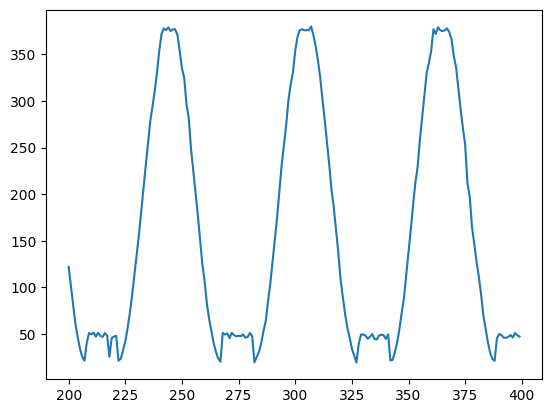

In [ ]:
TRAFFIC.plot()